In [13]:
#import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection

In [61]:
#Load the dataset
df = pd.read_excel('Processed_Flipdata.xlsx')

In [63]:
df.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999


In [64]:

print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

There are 541 observations and 12 features in this dataset. 



In [60]:
df.tail()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,5998
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,9990
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core",38999
540,642,OPPO A77,Sky Blue,128,4,5000,50MP,8MP,0,16.66,Mediatek Helio G35,15999


There are 541 observations and 12 features in this dataset. 



In [112]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          541 non-null    object 
 1   Colour         541 non-null    object 
 2   Memory         541 non-null    int64  
 3   RAM            541 non-null    int64  
 4   Battery_       541 non-null    int64  
 5   Rear Camera    541 non-null    object 
 6   Front Camera   541 non-null    object 
 7   AI Lens        541 non-null    int64  
 8   Mobile Height  541 non-null    float64
 9   Processor_     541 non-null    object 
 10  Prize          541 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 46.6+ KB


**Observations:**
 - There is some Null values that we need to deal with.
 - All the data types seem alright.

In [114]:
df.describe()

,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,110.550832,5.397412,4871.587800,0.062847,16.431201,16228.375231
std,60.600694,1.984923,780.148862,0.242911,2.523553,10793.588322
min,16.000000,2.000000,800.000000,0.000000,4.500000,920.000000
25%,64.000000,4.000000,5000.000000,0.000000,16.510000,9290.000000
50%,128.000000,6.000000,5000.000000,0.000000,16.710000,13499.000000
75%,128.000000,8.000000,5000.000000,0.000000,16.940000,19280.000000
max,256.000000,8.000000,7000.000000,1.000000,41.940000,80999.000000


**Observations**:
- The data need to scale to make the model make better predictions.
- There is some outliers we need to deal with.
- There is value = 0 in the "Rear Camera" column .

## **Data Cleaning**

In [ ]:
# Droping the records that over 150k in "price" column

df.drop(df.index[df['Prize'] > 150000], inplace = True)

In [ ]:
# Droping the wrong value in "Rear Camera" column

df.drop(df.index[df["Rear Camera"] == 0], inplace = True)

**Missing Values**

In [124]:
df.isna().sum()

Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

**Observation**:
 - There are no missing values

**Checking for duplicates**

In [125]:
df.duplicated().sum()

0

## **Data Visualisation**

In [127]:
df["Model"].nunique()

187

In [128]:
# Top 5 brands in the data
df["Model"].unique()[:5]

array(['Infinix SMART 7', 'MOTOROLA G32', 'POCO C50', 'Infinix HOT 30i',
       'REDMI 10'], dtype=object)

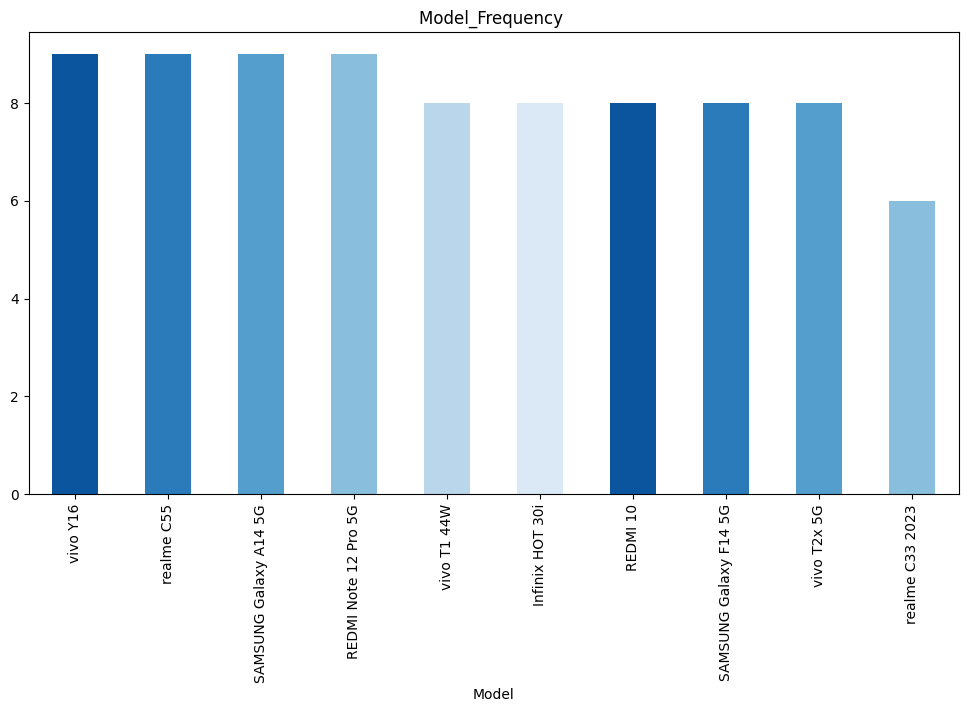

In [65]:
brand_name_counts = df['Model'].value_counts()
brand_name_counts[:10].plot(kind = 'bar', color = sns.color_palette("Blues_r"), title = "Model_Frequency ", figsize = (12,6))
plt.savefig(f"Top Five Models.PNG")
    

**Observation**:
 - Redmi Note 12 Pro, Vivo Y16 , realme C55 are  the most frequent in the data

In [140]:
print(df.columns)


Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'Rear Camera',
       'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_', 'Prize'],
      dtype='object')


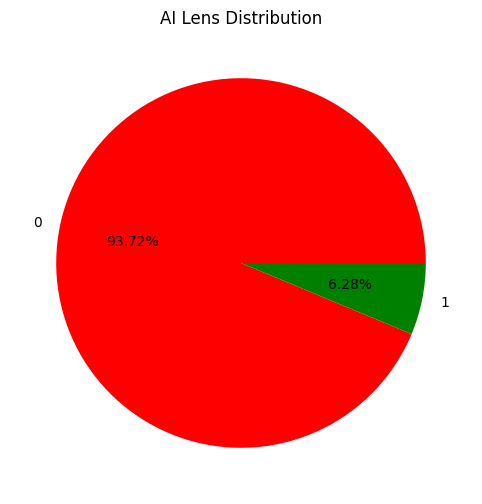

In [15]:
plt.figure(figsize=(12, 6))
_AI_Lens_or_not_df = df['AI Lens'].value_counts(normalize=True).sort_values(ascending=False).to_frame()
custom_colors = ['red', 'green', 'blue', 'yellow']  # Example custom colors list
plt.pie(_AI_Lens_or_not_df['proportion'], labels=_AI_Lens_or_not_df.index, colors=custom_colors, autopct='%0.2f%%')
plt.title("AI Lens Distribution")
plt.savefig(f"AI Lens.PNG")


**Observation**
 - Only 7% of the phones have AI Lens

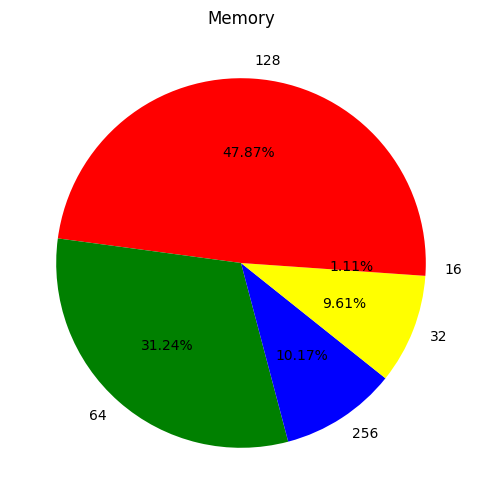

In [16]:
plt.figure(figsize = (12, 6))
Memory = (df['Memory'].value_counts(normalize = True)).sort_values(ascending = False).to_frame()
plt.pie(Memory['proportion'], labels = Memory.index, colors=custom_colors
       ,autopct = '%0.2f%%')
plt.title("Memory")
plt.savefig(f"Memory.PNG")

**Observation:**
 - 48% of the mobile phone have 128GB Memory

In [8]:
# To get the values of the memory of the mobile phones 
df['Processor_'].value_counts()

Processor_
Qualcomm Snapdragon 680        33
Unisoc T612                    21
Mediatek Helio A22             19
Mediatek Dimensity 1080        18
Qualcomm Snapdragon 695 5G     17
                               ..
Qualcomm Snapdragon 439         1
Snapdragon 680                  1
snapdragon 888                  1
Qualcomm Snapdragon 855         1
Qualcomm Snapdragon 8 Gen 2     1
Name: count, Length: 123, dtype: int64

In [9]:
list(df['Processor_'].value_counts().keys()[0:5])

['Qualcomm Snapdragon 680',
 'Unisoc T612',
 'Mediatek Helio A22',
 'Mediatek Dimensity 1080',
 'Qualcomm Snapdragon 695 5G']

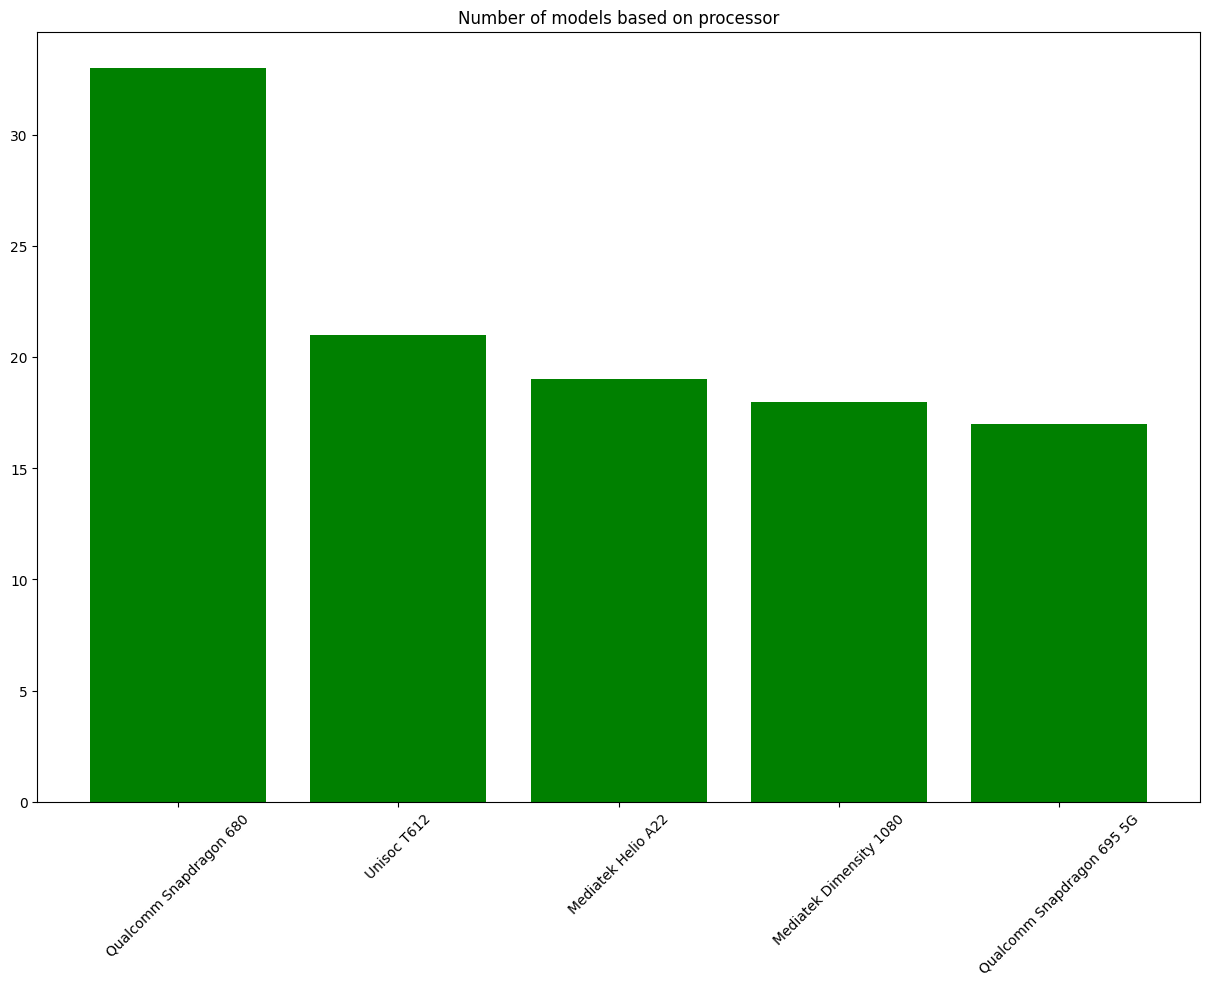

<Figure size 640x480 with 0 Axes>

In [17]:
plt.figure(figsize=(15,10))
plt.bar(list(df['Processor_'].value_counts()[0:5].keys()), list(df['Processor_'].value_counts()[0:5]), color="g")
plt.title("Number of models based on processor")
plt.xticks(rotation = 45)
plt.show()
plt.savefig(f"Number of models based on processor.PNG")


**Observation:**
 - Most of the mobile phone have Qualcomm Snapdragon 680 processor

In [39]:
#To get the number of models of a particular brand
df['Model'].value_counts()

Model
vivo Y16                 9
realme C55               9
SAMSUNG Galaxy A14 5G    9
REDMI Note 12 Pro 5G     9
vivo T1 44W              8
                        ..
vivo Y1s                 1
OnePlus Nord             1
Micromax 3               1
vivo Y33s                1
OPPO A77                 1
Name: count, Length: 187, dtype: int64

In [40]:
df['Front Camera'].value_counts()

Front Camera
16MP    164
5MP     135
8MP     129
13MP     49
32MP     22
0MP      16
50MP      7
12MP      6
60MP      4
2MP       3
10MP      2
20MP      2
44MP      2
Name: count, dtype: int64

In [20]:
front_camera = df[df['Front Camera']!=0]

In [21]:
front_camera.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999


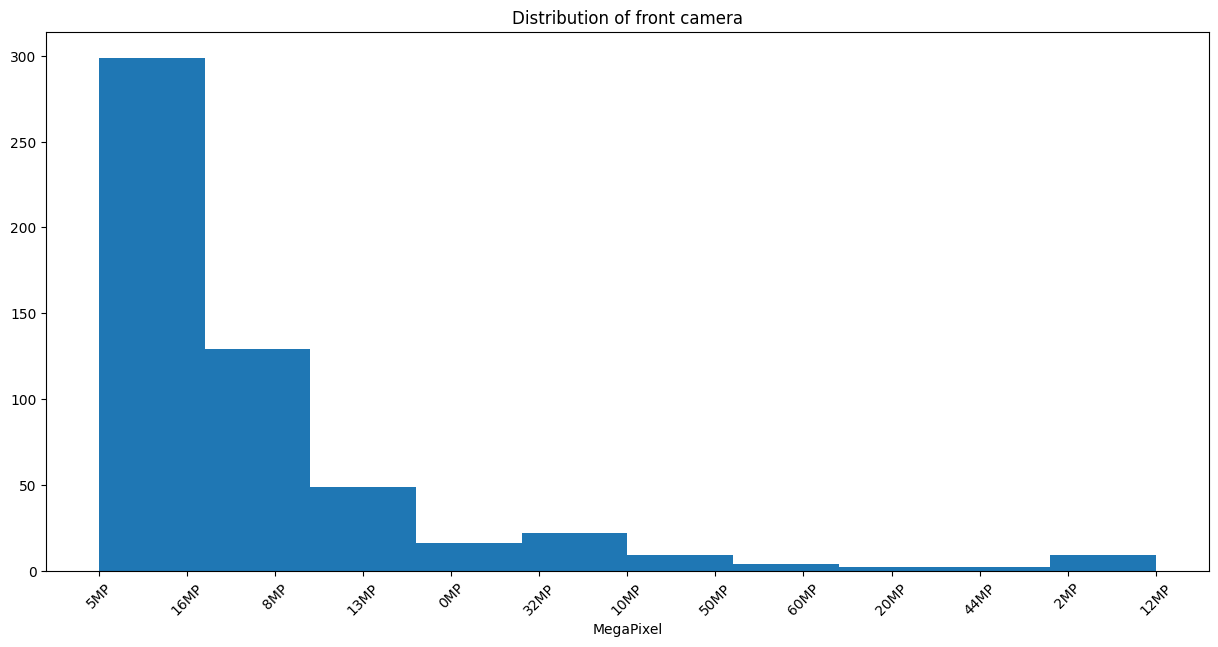

<Figure size 640x480 with 0 Axes>

In [22]:
plt.figure(figsize=(15,7))
plt.hist(front_camera['Front Camera'])
plt.title("Distribution of front camera")
plt.xlabel("MegaPixel")
plt.xticks(rotation = 45)
plt.show()
plt.savefig(f"Distribution of front camera.PNG")

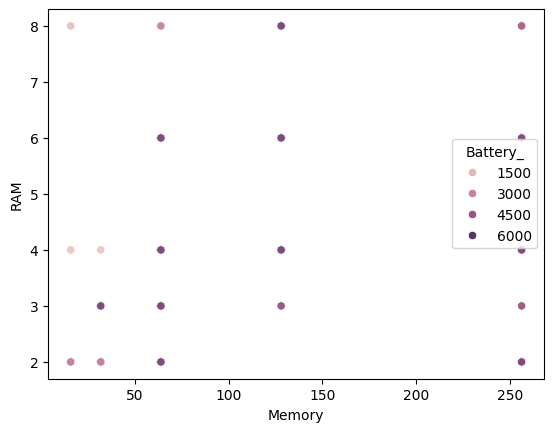

In [23]:
sns.scatterplot(x= 'Memory', y = 'RAM', data =df, hue='Battery_')
plt.show
plt.savefig(f"Memory with RAM.PNG")

**Final Preprocessing**

In [151]:
df.head()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999


In [153]:
#We will drop "model" column because the column contain alot of unique values and dont's give much info
df.drop(["Model"],axis=1,inplace=True)

# **Modelling**

In [169]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

def scale_column(data, column_name):
    scaler = StandardScaler()
    column_to_scale = pd.to_numeric(data[column_name], errors='coerce')  # Convert non-numeric values to NaN
    non_numeric_indices = column_to_scale.index[column_to_scale.isnull()]  # Store indices of non-numeric values
    column_to_scale = column_to_scale.dropna()  # Drop NaN values
    if len(column_to_scale) > 0:  # Check if there are any samples remaining
        column_to_scale = column_to_scale.values.reshape(-1, 1)
        scaled_data = scaler.fit_transform(column_to_scale)
        
        # Replace scaled values back into DataFrame using indices
        for i, index in enumerate(data[column_name].dropna().index):
            data.loc[index, column_name] = scaled_data[i][0]

# Drop non-numeric columns
columns_to_scale = df.drop(columns=["Colour", "Prize"])

# Scale numeric columns
for column in columns_to_scale:
    scale_column(df, column)

C:\Users\asus\AppData\Local\Temp\ipykernel_19972\848951332.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '3.8233031607267987' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[index, column_name] = scaled_data[i][0]


**Encodeing the string values**

In [170]:
cat_col=[col for col in df.columns
    if df[col].dtype == 'object']

df = pd.get_dummies(df,columns=cat_col,sparse=False)

In [173]:
# Feature Extraction
X = df.drop(columns ="Prize")
y = df["Prize"]

In [174]:
# Getting the shape of X and y
print(X.shape)
print(y.shape)

(531, 430)
(531,)


In [175]:
# Spliting the data into training and testing data with 80,20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [176]:
# Printing the shape of our training and testing data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (424, 430)
y_train shape: (424,)
X_test shape: (107, 430)
y_test shape: (107,)


Some points will help choose the model:

 - Our data is labeled (price) so we will use Supervised Learning model.
 - Our label has num values so we will use Regression model.

In [177]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth = 50,
                                max_features =  'sqrt',
                                min_samples_leaf = 1,
                                min_samples_split = 2,
                                bootstrap= False,
                                max_leaf_nodes=200,
                                n_estimators = 150,
                                random_state = 42)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=50, max_features='sqrt',
                      max_leaf_nodes=200, n_estimators=150, random_state=42)

In [178]:
print("Training Accuracy:" , round(model.score(X_train, y_train),2),"%")
print("Testing Accuracy:" , round(model.score(X_test, y_test),2),"%")

Training Accuracy: 1.0 %
Testing Accuracy: 0.82 %


# **Linear Regression**

In [10]:
df.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999


In [17]:
y = df[['Prize']]

In [18]:
x = df[['Memory']]

# **Modelling**

In [36]:
from sklearn.model_selection import train_test_split

**Model-1**

In [37]:
# Split the data to training and testing sets
x_train,x_test,y_train , y_test = train_test_split(x,y,test_size=0.3)

In [38]:
x_train.head()

,AI Lens,Mobile Height,Battery_,RAM
311,0,16.76,5000,4
247,0,4.57,1000,4
65,0,16.76,6000,6
479,0,16.59,5000,4
224,0,16.94,5000,8


In [39]:
x_test.head()

,AI Lens,Mobile Height,Battery_,RAM
5,1,16.76,5000,8
457,0,16.64,4300,6
336,0,16.76,5000,4
33,0,17.04,5000,4
322,0,16.76,5000,4


In [40]:
y_train.head()

,Prize
311,8069
247,920
65,14490
479,8999
224,23999


In [41]:
y_test.head()

,Prize
5,8999
457,29790
336,8495
33,7749
322,15999


In [42]:
from sklearn.linear_model import LinearRegression
# Initialize the linear regression
lr = LinearRegression()

In [43]:
# Train the model
lr.fit(x_train,y_train)

LinearRegression()

In [44]:
y_pred = lr.predict(x_test)

In [45]:
y_test.head()

,Prize
5,8999
457,29790
336,8495
33,7749
322,15999


In [46]:
y_pred[0:5]

array([[19397.50822613],
       [18988.39847549],
       [12535.77999285],
       [12693.0810267 ],
       [12535.77999285]])

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error_for_model1 = mean_squared_error(y_test,y_pred)
print(f" The mean_squared_error_for_model1 for the LinearRegression model is {mean_squared_error_for_model1}")

 The mean_squared_error_for_model1 for the LinearRegression model is 85546342.41769049


**Model 2**

In [48]:
y = df[['Prize']]

In [49]:
x = df[['AI Lens', 'Mobile Height','Battery_','RAM']]

In [50]:
# Split the data to training and testing sets
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size= 0.3)

In [51]:
# Initialize the linear regression
lr2 = LinearRegression()

In [52]:
# Train the model
lr2.fit(x_train,y_train)


LinearRegression()

In [53]:
y_pred = lr2.predict(x_test)

In [96]:
mean_squared_error_for_model2 = mean_squared_error(y_test,y_pred)
print(f" The mean_squared_error_for_model2 for the LinearRegression model is {mean_squared_error_for_model2} %")

 The mean_squared_error_for_model2 for the LinearRegression model is 69346957.50256658 %


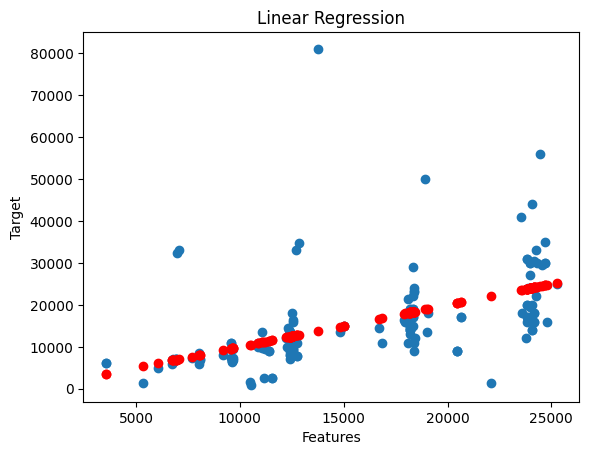

<Figure size 640x480 with 0 Axes>

In [54]:
plt.scatter(y_pred,y_test )
plt.scatter(y_pred,y_pred, color = 'red')
plt.xlabel("Features")
plt.ylabel("Target")
plt.title("Linear Regression")
plt.show()
plt.savefig(f"Linear Regression Model.PNG")


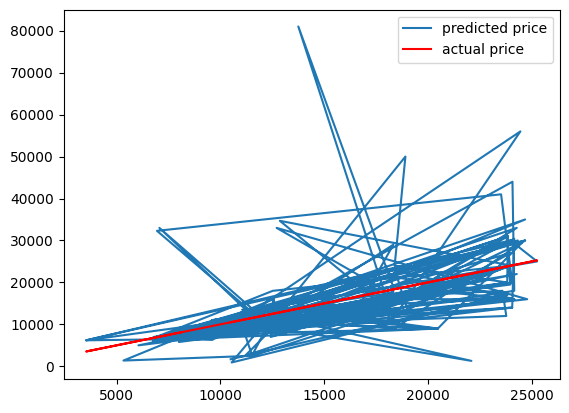

<Figure size 640x480 with 0 Axes>

In [55]:
plt.plot(y_pred, y_test, label = 'predicted price')
plt.plot(y_pred, y_pred, color = 'red', label = 'actual price')
plt.legend()
plt.show()
plt.savefig(f"Actuak and Predicted Prices.PNG")

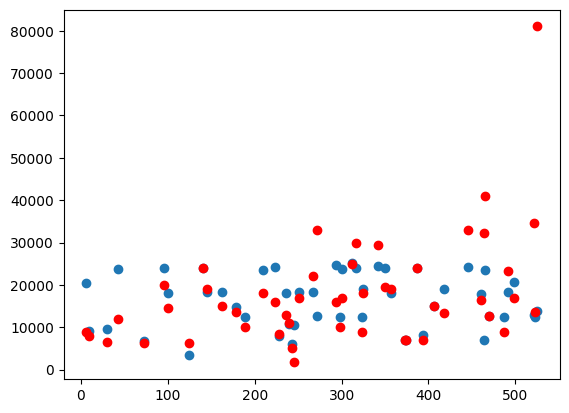

In [56]:
plt.scatter(y_test[:50].index, y_pred[:50])
plt.scatter(y_test[:50].index, y_test[:50], color = 'red')
plt.savefig(f"Model.PNG")

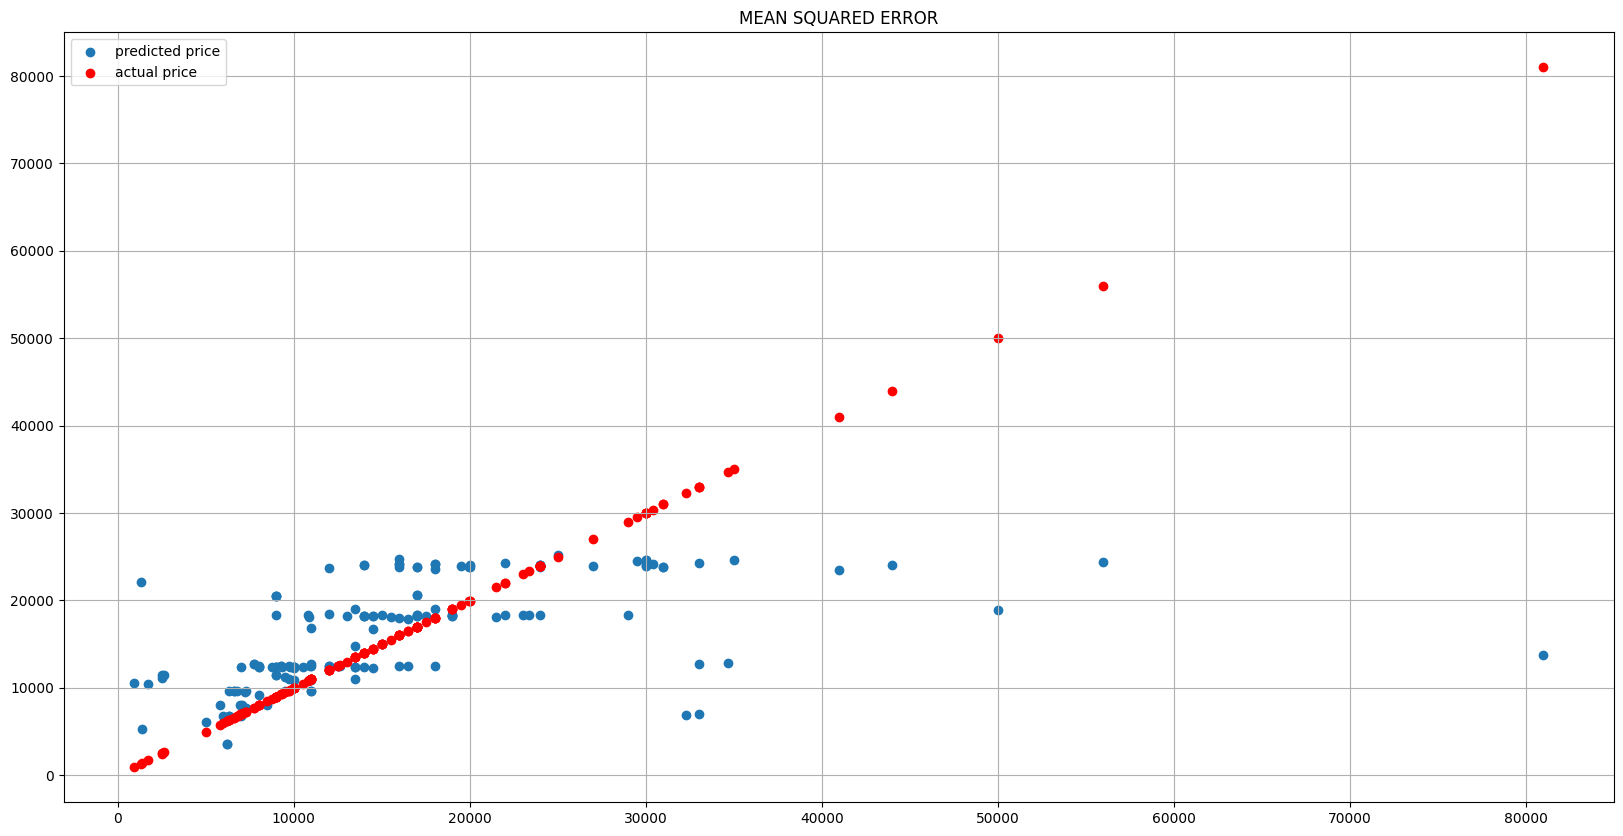

<Figure size 640x480 with 0 Axes>

In [57]:
plt.figure(figsize= [20,10])
plt.scatter(y_test, y_pred, label = 'predicted price')
plt.scatter(y_test, y_test, color = 'red', label = 'actual price')
plt.plot(color = 'green', label = 'MEAN SQUARED ERROR')
plt.title("MEAN SQUARED ERROR")
plt.legend()
plt.grid()
plt.show()
plt.savefig(f"Mean Squared Error.PNG")